### Import required libraries

In [3]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Load data

In [4]:
df = pd.read_csv("Churn.csv")

display(df.head(10))
print(df.shape)
df.info()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 n

### Data Preprocessing

In [5]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [6]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

### One-hot Encoding

In [8]:
df = pd.get_dummies(df, drop_first=True)
display(df.head(10))
print(df.info())

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

### Label Encoding

In [9]:
# LE = LabelEncoder()

# df['Churn'] = LE.fit_transform(df['Churn'])
# df['Intl_Plan'] = LE.fit_transform(df['Intl_Plan'])
# df['Vmail_Plan'] = LE.fit_transform(df['Vmail_Plan'])

# # df['Churn'] = df['Churn'].astype('category')
# # df['Intl_Plan'] = df['Intl_Plan'].astype('category')
# # df['Vmail_Plan'] = df['Vmail_Plan'].astype('category')



# print(df.info())

### Target variable

In [10]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

### Feature and target variable separation

In [11]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


### Data Transformation

In [12]:
scaler = MinMaxScaler()

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
1723,0.326446,0.000000,0.427024,0.759692,0.586875,0.545,0.222222,0.0,0.0,0.745455,0.427062,0.441176,0.759948,0.295775,0.586970,0.35,0.544444
2804,0.107438,0.000000,0.235462,0.560902,0.540613,0.455,0.111111,0.0,0.0,0.636364,0.235412,0.582353,0.560984,0.626761,0.540944,0.20,0.455556
2822,0.636364,0.000000,0.464937,0.802035,0.196880,0.560,0.000000,1.0,0.0,0.569697,0.464956,0.635294,0.802006,0.549296,0.197250,0.15,0.559259
295,0.681818,0.000000,0.582098,0.494638,0.520710,0.475,0.111111,0.0,0.0,0.696970,0.581992,0.894118,0.494662,0.535211,0.521219,0.25,0.475926
1950,0.210744,0.000000,0.441847,0.366786,0.411243,0.350,0.444444,0.0,0.0,0.666667,0.441818,0.611765,0.366872,0.359155,0.411237,0.20,0.350000
2590,0.528926,0.588235,0.505416,0.582348,0.583647,0.465,0.333333,0.0,1.0,0.575758,0.505366,0.600000,0.582336,0.528169,0.583981,0.35,0.464815
3164,0.210744,0.000000,0.582668,0.751169,0.420656,0.550,0.111111,0.0,0.0,0.587879,0.582663,0.752941,0.751213,0.598592,0.420801,0.25,0.550000
693,0.376033,0.568627,0.442987,0.518284,0.623185,0.400,0.333333,0.0,1.0,0.666667,0.442991,0.611765,0.518279,0.598592,0.623431,0.20,0.400000
3119,0.338843,0.000000,0.336089,0.441023,0.570468,0.570,0.000000,0.0,0.0,0.612121,0.336016,0.541176,0.440958,0.823944,0.570831,0.50,0.570370
2486,0.309917,0.000000,0.493729,0.360737,0.397257,0.270,0.000000,0.0,0.0,0.563636,0.493628,0.470588,0.360725,0.500000,0.397490,0.15,0.270370


### Benefit of using Data Transformation
Data transformation is used to make the priority of every column equal. Improvement of model performance using data transformation depends upon provided data set. If there is outlayer in the data set, transforming data will not be a good option. 
- For linear regression and tree-based models Data transformation is not necessary but for advanced model like K-means clustering data transformation is important.


### Spliting the original dataset into the train set (70%) and the test set (30%)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


### Training: Decision Tree Classifier

In [14]:
# model = LogisticRegression()
model = DecisionTreeClassifier()
# model = RandomForestClassifier()
model = model.fit(X_train, y_train)

### Prediction

In [15]:
y_pred = model.predict(X_test)

### Prediction Comparison with the test data

In [16]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn,probability,predicted_Churn
1671,0,0.0,0
602,0,0.0,0
631,0,0.0,0
68,0,0.0,0
221,0,0.0,0
3325,0,0.0,0
1972,0,0.0,0
3199,0,0.0,0
417,0,0.0,0
1641,0,0.0,0


### Tree Diagram of the Decision Tree

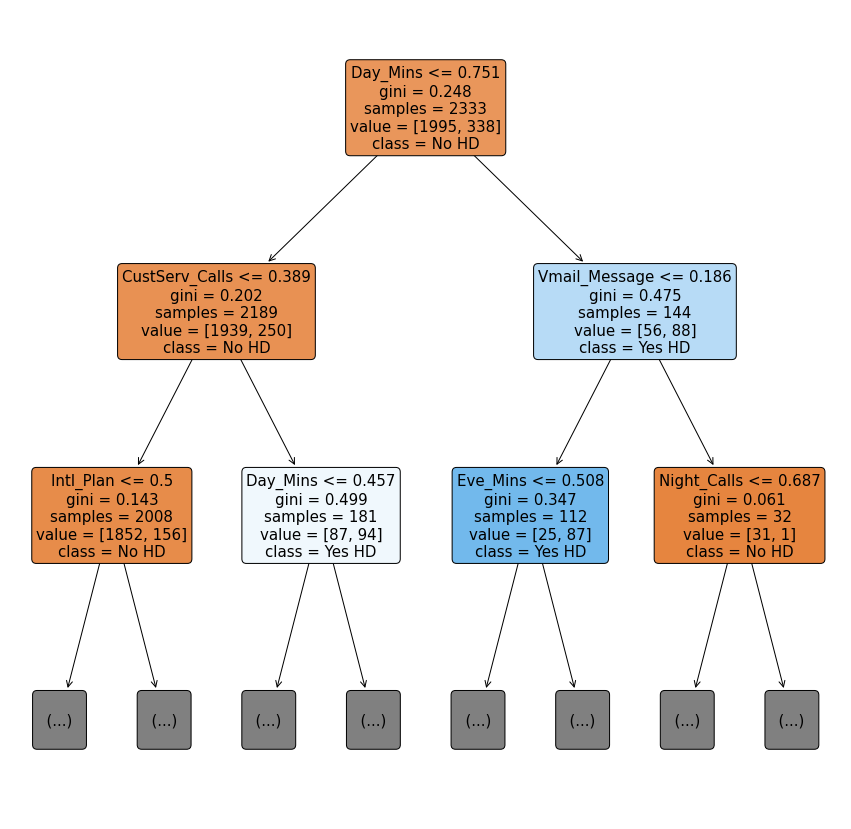

In [17]:
plt.figure(figsize = (15, 15))
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["No HD", "Yes HD"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

In [18]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
934,0.822314,0.000000,0.365450,0.366236,0.415277,0.560,0.111111,0.0,0.0,0.527273,0.365359,0.617647,0.366225,0.633803,0.415421,0.10,0.559259,0,1.0,1
832,0.355372,0.000000,0.919327,0.562552,0.438408,0.470,0.222222,0.0,0.0,0.642424,0.919349,0.547059,0.562601,0.669014,0.438733,0.20,0.470370,1,1.0,1
747,0.636364,0.000000,0.526226,0.538906,0.546799,0.390,0.111111,0.0,0.0,0.618182,0.526157,0.688235,0.538984,0.626761,0.546922,0.05,0.390741,0,0.0,0
2446,0.512397,0.000000,0.482611,0.428925,0.504572,0.580,0.222222,0.0,0.0,0.545455,0.482562,0.811765,0.428987,0.514085,0.505081,0.30,0.579630,0,0.0,0
1874,0.272727,0.000000,0.434721,0.693979,0.436256,0.245,0.222222,0.0,0.0,0.793939,0.434775,0.629412,0.693950,0.500000,0.436342,0.15,0.244444,0,0.0,0
3081,0.838843,0.000000,0.496864,0.698653,0.412049,0.295,0.666667,0.0,0.0,0.515152,0.496814,0.558824,0.698803,0.443662,0.412433,0.15,0.294444,0,0.0,0
452,0.371901,0.000000,0.424743,0.674457,0.636902,0.415,0.000000,0.0,0.0,0.696970,0.424715,0.617647,0.674539,0.429577,0.637179,0.15,0.414815,0,0.0,0
1116,0.533058,0.000000,0.444413,0.704152,0.644701,0.585,0.333333,0.0,0.0,0.575758,0.444333,0.570588,0.704303,0.492958,0.644949,0.15,0.585185,0,0.0,0
594,0.367769,0.000000,0.586374,0.445147,0.662991,0.625,0.222222,0.0,0.0,0.836364,0.586351,0.488235,0.445163,0.500000,0.663479,0.30,0.625926,0,0.0,0
758,0.442149,0.588235,0.788483,0.605169,0.416084,0.490,0.222222,0.0,1.0,0.600000,0.788397,0.664706,0.605306,0.436620,0.416617,0.30,0.490741,0,0.0,0


## Model Performance Evaluation

### Confusion Matrix 

In [19]:
confusion_matrix_ = confusion_matrix(y_test['Churn'], 
                                     y_test['predicted_Churn'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[821  34]
 [ 47  98]]


In [20]:
y_test['Churn'].value_counts()

0    855
1    145
Name: Churn, dtype: int64

### Plotting Confusion Matrix

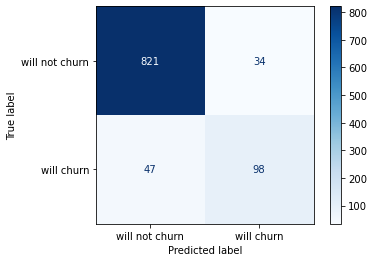

In [21]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Blues')
plt.show()

In [22]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  821
False Negatives =  47
False Positives =  34
True Positives =  98


### Accuracy

In [23]:
print("Calculated __________________________")
# calculate the accuracy of the model from the confusion matrix
accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ', accuracy)

print("\nScikit-Learn ________________________")
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['Churn'], 
                           y_test['predicted_Churn'])

print('Accuracy: ', accuracy_)

Calculated __________________________
Accuracy:  0.919

Scikit-Learn ________________________
Accuracy:  0.919


### Precision, Recall/Sensitivity/True Positive Rate, F1 score


**precision:** Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

**recall:** Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

**f1 score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**support:** Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [24]:
print("Calculated __________________________")
precision = np.round(TP/(TP+FP), 2)
recall = np.round(TP/(TP+FN), 2)
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1 score = ", f1_score_)

print("\nScikit-Learn ________________________")
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['predicted_Churn']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['predicted_Churn']), 2)
f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['predicted_Churn']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Calculated __________________________
Precision =  0.74
Recall =  0.68
f1 score =  0.71

Scikit-Learn ________________________
Precision =  0.74
Recall =  0.68
f1 score =  0.71


### True Positive Rate, False Positive Rate

In [25]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.68
False Positive Rate =  0.04


### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

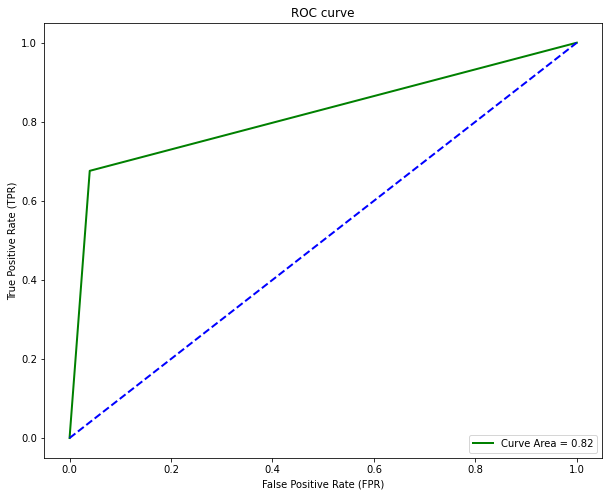

In [26]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)
plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.000000,0.000000
1,1.0,0.039766,0.675862
2,0.0,1.000000,1.000000


### Classification report

In [28]:
class_report = classification_report(y_test['Churn'], 
                                     y_test['predicted_Churn'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       855
           1       0.74      0.68      0.71       145

    accuracy                           0.92      1000
   macro avg       0.84      0.82      0.83      1000
weighted avg       0.92      0.92      0.92      1000



### Label Encoding 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       855
           1       0.69      0.67      0.68       145

    accuracy                           0.91      1000


### One hot encoding

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.71      0.69      0.70       145

    accuracy                           0.91      1000
    
From here , we can see , the accuracy and other KPI is almost equal in both Label & one hot encoding. But from close observation that is found that One hot encoding is a bit better in case of precision, recall & f1-score.So, we can conclude that One hot encoding is performing better.

## Grid Search and cross-validation


In [29]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [30]:
y_pred = np.round(grid_result.predict(X_test), 2)

### Best hyperparameters in the grid search

In [31]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [32]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.952790,0.920601,0.937847,0.012654,1
4,gini,7,0.940043,0.925054,0.929336,0.954936,0.937768,0.937427,0.010316,2
2,gini,5,0.937901,0.914347,0.946467,0.944206,0.942060,0.936996,0.011672,3
9,entropy,7,0.935760,0.927195,0.946467,0.929185,0.942060,0.936133,0.007352,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.935622,0.937768,0.933136,0.010594,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.892704,0.899142,0.900982,0.011798,9
5,entropy,3,0.886510,0.905782,0.907923,0.892704,0.873391,0.893262,0.012747,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


### Model performance evaluation with the best found model in grid search and cross-validation

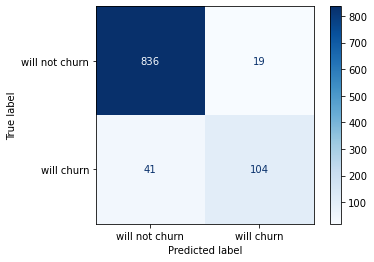

In [33]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Blues')
plt.show()

### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

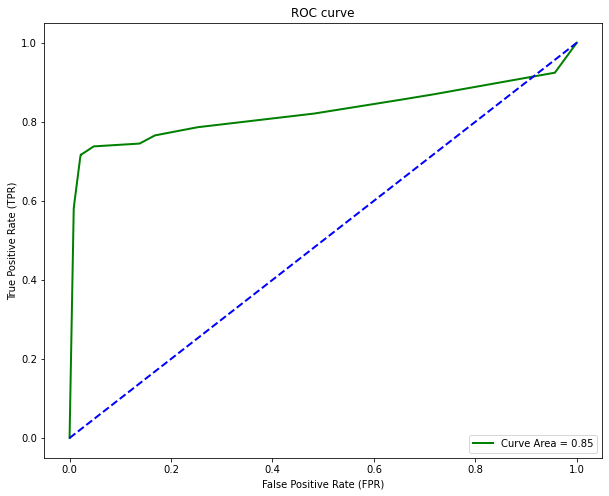

In [34]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Classification report

In [35]:
class_report = classification_report(y_test['Churn'], 
                                    y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.85      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



With the best found model in grid search and cross-validation, we see the accuracy has increased 94% which was 91% formerly. 
Moreover , precision, recall, f1-score and support for both class-0 & class-1 has also increased. So, the best model found in grid search & cross-validation in performing well.